In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
# Fetch stock data using yfinance
ticker = "TSLA"
data = yf.download(ticker, start="2019-11-15", end="2025-3-08") #days closing price

balance = 10000




YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
print(data.tail())

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-03-03  284.649994  303.940002  277.299988  300.339996  115551400
2025-03-04  272.040009  284.350006  261.839996  270.929993  126706600
2025-03-05  279.100006  279.549988  267.709991  272.920013   94042900
2025-03-06  263.450012  272.649994  260.019989  272.059998   98451600
2025-03-07  262.670013  266.250000  250.729996  259.320007  102193000


# MOST RUNS


<ipython-input-3-cf646d203f69>:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(data['Close'].iloc[i])
<ipython-input-3-cf646d203f69>:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(data['Close'].iloc[i])


Final Balance: $256516.18


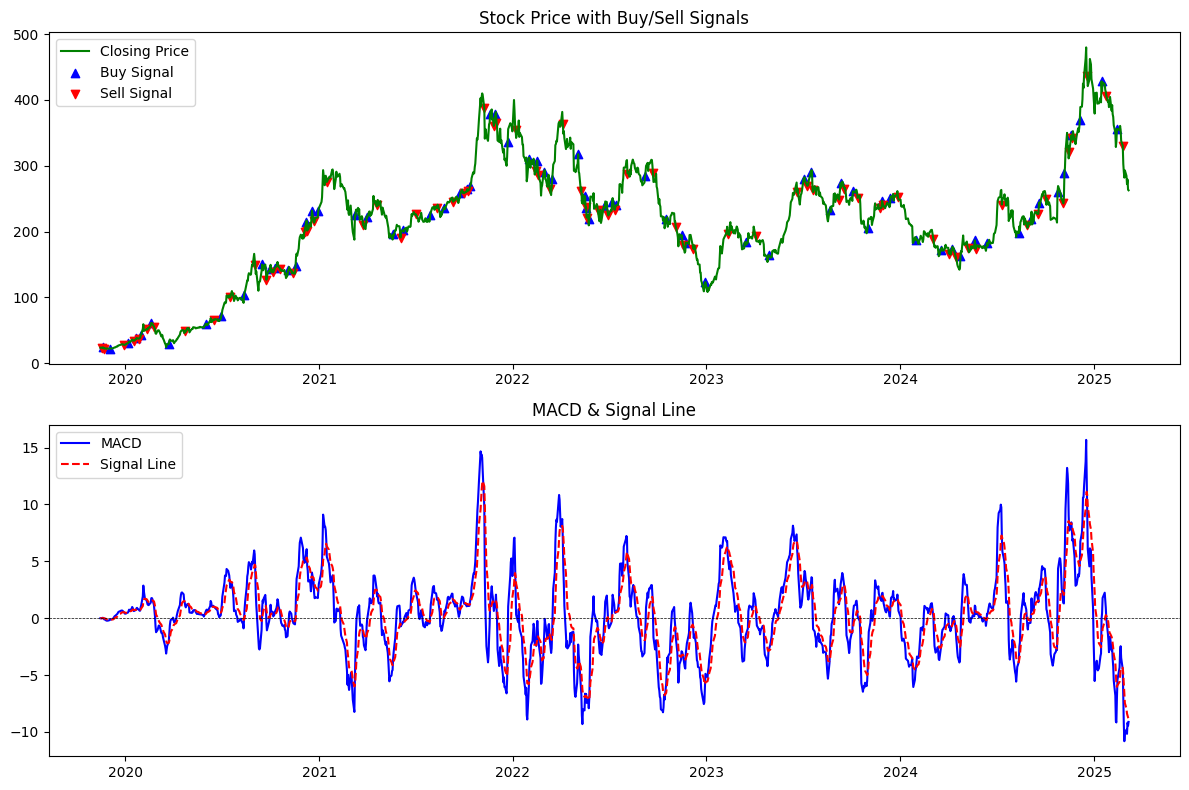

Price           Close       High        Low       Open     Volume  Short EMA  \
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA              
Date                                                                           
2019-11-15  23.478001  23.520000  23.224001  23.375999   72135000  23.478001   
2019-11-18  23.332666  23.543333  23.073334  23.528000   66006000  23.436477   
2019-11-19  23.968000  23.999332  23.186666  23.450001  115872000  23.588341   
2019-11-20  23.481333  24.080000  23.304667  24.000000  100876500  23.557767   
2019-11-21  23.655333  24.056000  23.600000  23.634001   91650000  23.585643   

Price        Long EMA      MACD Signal Line Buy Signal Sell Signal  
Ticker                                                              
Date                                                                
2019-11-15  23.478001  0.000000    0.000000      False       False  
2019-11-18  23.448934 -0.012457   -0.002491      False        True  
2019-11-19  23

In [3]:
def calculate_macd(data, short_window=6, long_window=9, signal_window=9):
    """
    Calculate MACD and Signal Line. 50 75 35
    """
    data['Short EMA'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['Long EMA'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['Short EMA'] - data['Long EMA']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

def generate_signals(data):
    """
    Generate buy and sell signals based on MACD and Signal Line crossovers.
    """
    data['Buy Signal'] = (data['MACD'] > data['Signal Line']) & (data['MACD'].shift(1) <= data['Signal Line'].shift(1))
    data['Sell Signal'] = (data['MACD'] < data['Signal Line']) & (data['MACD'].shift(1) >= data['Signal Line'].shift(1))
    return data

def backtest(data):
    """
    Simulate a simple trading strategy based on buy and sell signals.
    """
    global balance  # Declare balance as global to modify it within the function
    holdings = 0
    for i in range(len(data)):
        price = data['Close'].iloc[i].item()  # Fetch scalar value as native type
        if data['Buy Signal'].iloc[i]:
            # Extract the price as a scalar
            price = float(data['Close'].iloc[i])
            holdings = balance // price
            balance -= holdings * price
            #print(f"Bought {holdings} shares at {price:.2f} on {data.index[i]}")
        elif data['Sell Signal'].iloc[i] and holdings > 0:
            # Extract the price as a scalar
            price = float(data['Close'].iloc[i])
            balance += holdings * price
            #print(f"Sold {holdings} shares at {price:.2f} on {data.index[i]}")
            #print(balance)
            holdings = 0

    # Final value of holdings
    balance += holdings * data['Close'].iloc[-1]
    # Ensure balance is a scalar value
    if isinstance(balance, pd.Series):
        balance = balance.iloc[0]  # Extract scalar value if balance is a Series

    print(f"Final Balance: ${float(balance):.2f}")

    return balance

def plot_macd(data):
    """
    Plot the stock price, MACD, Signal Line, and buy/sell signals.
    """
    plt.figure(figsize=(12, 8))

    # Plot stock closing price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Closing Price', color='green')
    plt.scatter(data.index[data['Buy Signal']], data['Close'][data['Buy Signal']], label='Buy Signal', marker='^', color='blue', alpha=1)
    plt.scatter(data.index[data['Sell Signal']], data['Close'][data['Sell Signal']], label='Sell Signal', marker='v', color='red', alpha=1)
    plt.title('Stock Price with Buy/Sell Signals')
    plt.legend()

    # Plot MACD and Signal Line
    plt.subplot(2, 1, 2)
    plt.plot(data['MACD'], label='MACD', color='blue')
    plt.plot(data['Signal Line'], label='Signal Line', color='red', linestyle='--')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.title('MACD & Signal Line')
    plt.legend()

    plt.tight_layout()
    plt.show()

if not data.empty:
  # Calculate MACD and Signal Line
  data = calculate_macd(data)

  # Generate Buy/Sell signals
  data = generate_signals(data)

  # Backtest the strategy
  final_balance = backtest(data)

  # Plot the results
  plot_macd(data)
  print(data.head())
else:
  print("Error fetching stock data. Check the ticker symbol.")

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Next day's predicted price: 267.8234


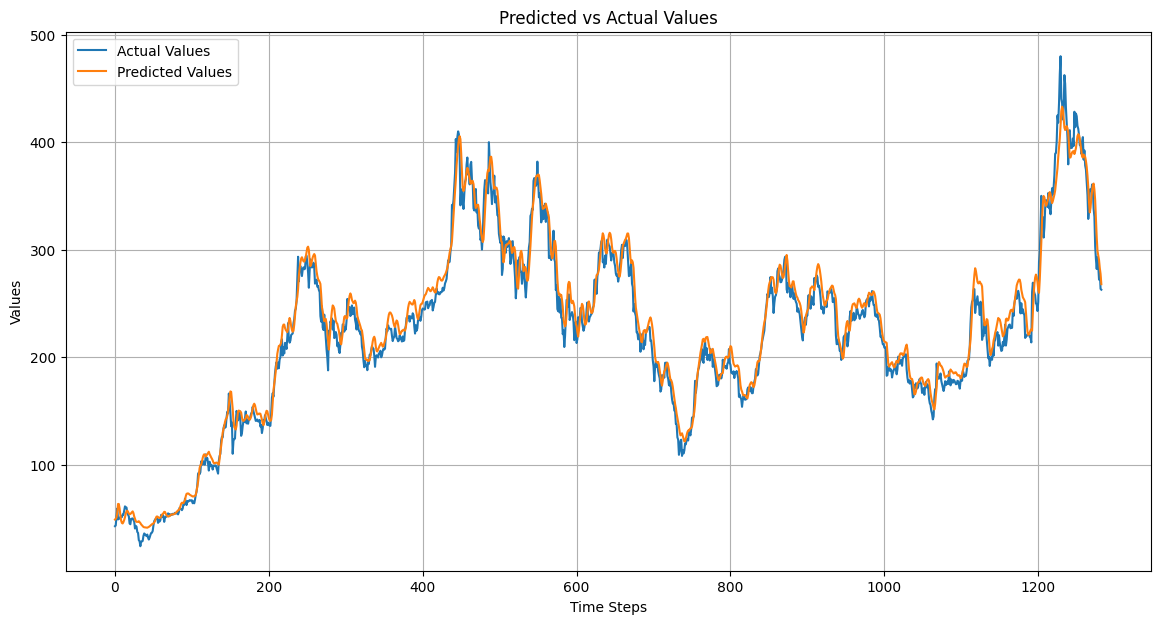

Mean Squared Error (MSE): 187.8923
Root Mean Squared Error (RMSE): 13.7074
Mean Absolute Error (MAE): 10.5145
R-squared (R²): 0.9737


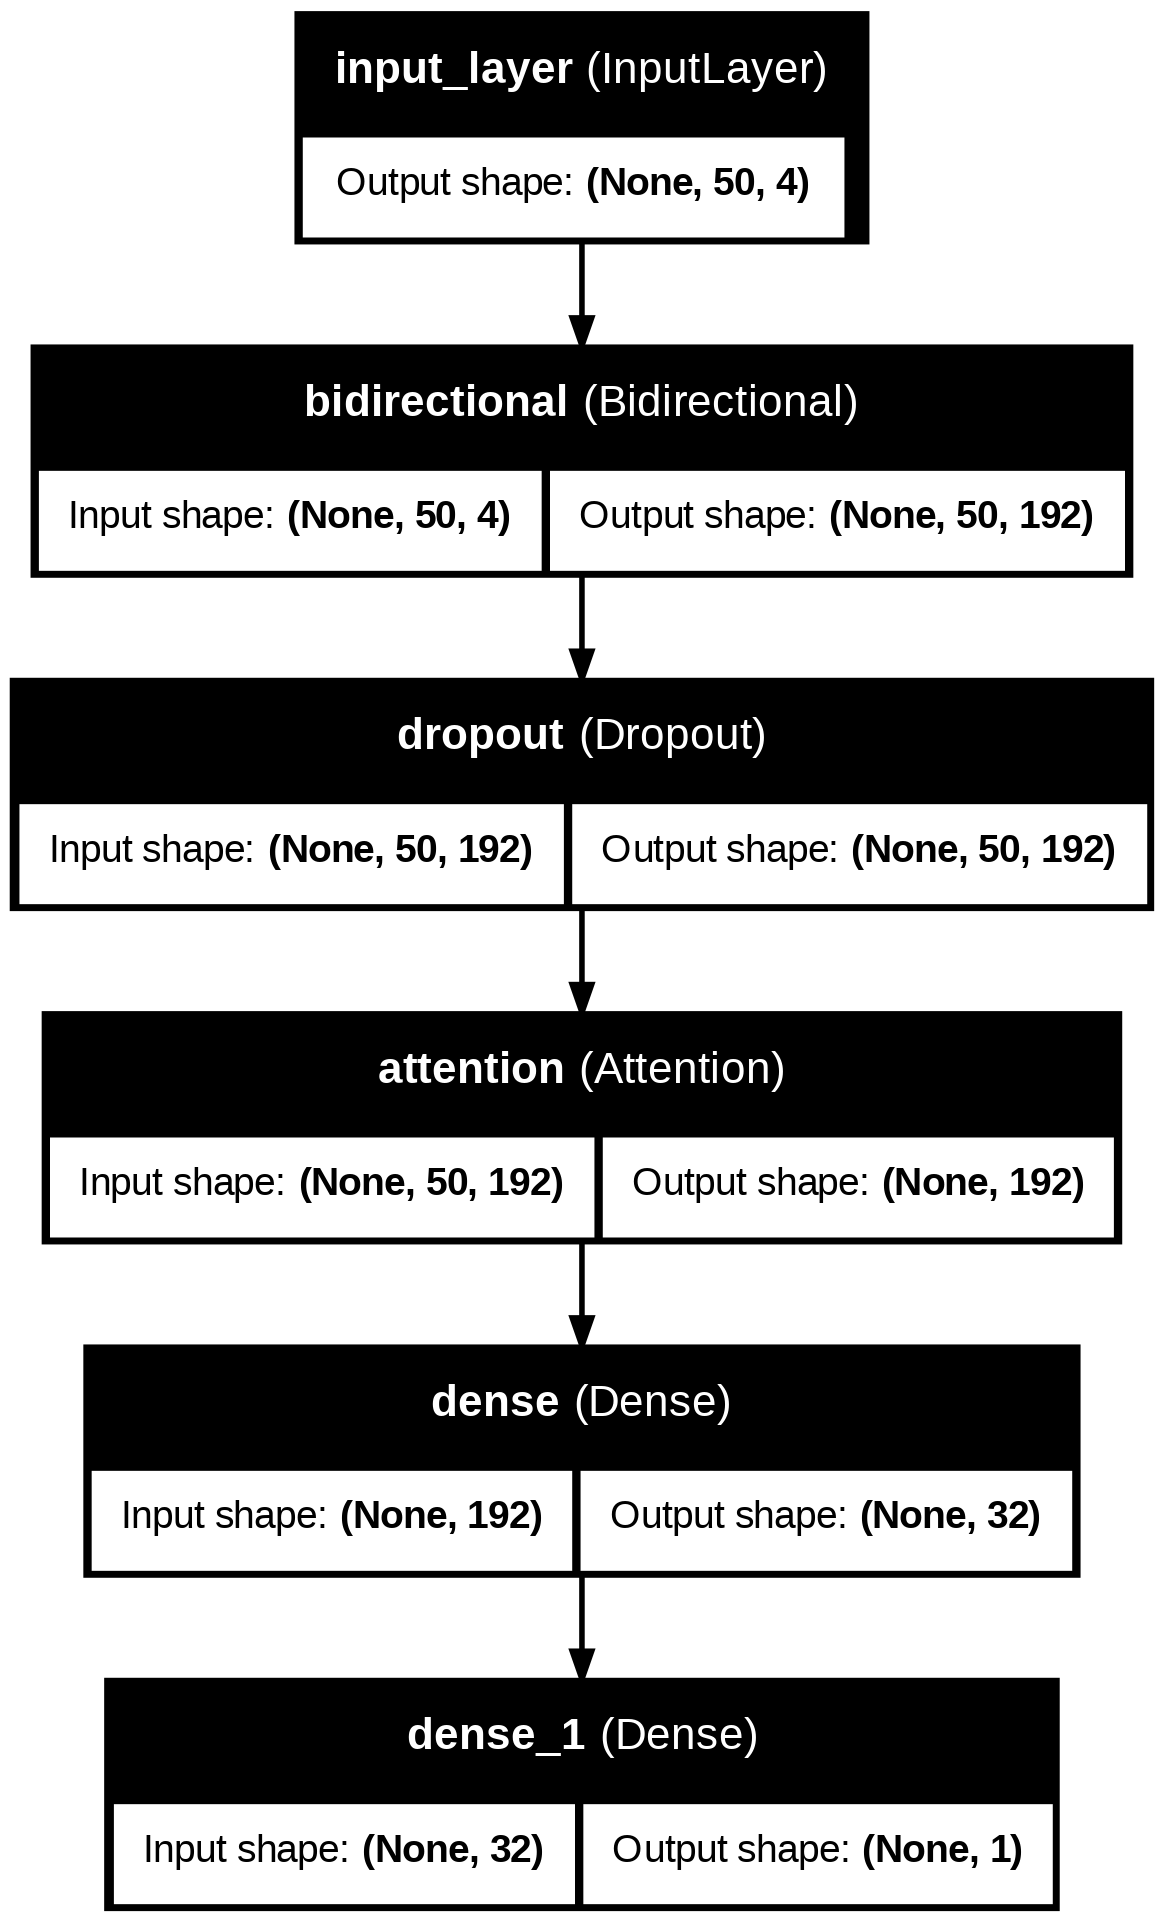

In [4]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


class Attention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='attention_bias',
                                 shape=(1,),
                                 initializer='zeros',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        context = x * a
        return tf.keras.backend.sum(context, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

def build_model_with_attention(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    lstm_out = Bidirectional(LSTM(96, return_sequences=True))(inputs)
    lstm_out = Dropout(0.5)(lstm_out)
    attention_out = Attention()(lstm_out)
    dense_out = Dense(32, activation='relu')(attention_out)
    outputs = Dense(1)(dense_out)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
    return model

# Define exponential decay function
def exponential_decay(epoch):
    k = 0.1
    initial_lr = 0.01
    return initial_lr * np.exp(-k * epoch)

# Polynomial Decay Function
def polynomial_decay(epoch):
    initial_lr = 0.01
    max_epochs = 100
    end_lr = 0.001
    decay_steps = max_epochs
    power = 1.0
    lr = (initial_lr - end_lr) * ((1 - epoch / decay_steps) ** power) + end_lr
    return lr
# Learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(polynomial_decay)

data1 = data[['Close']]  # Assuming 'Close' is the target column

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data1)
data_encoded = data[['Close', 'Volume', 'MACD', 'Signal Line']].fillna(0)
data_encoded = scaler.fit_transform(data_encoded)
data_encoded_df = pd.DataFrame(data_encoded, columns=['Close', 'Volume', 'MACD', 'Signal Line'], index=data.index)
# Parameters
sequence_length = 50  # This is the sequence length
X, y = [], []

# Create sequences
for i in range(len(data_scaled) - sequence_length):
    X.append(data_encoded_df[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Build and compile the model
input_shape = (X.shape[1], X.shape[2])
model = build_model_with_attention(input_shape)

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#model.fit(X, y, epochs=30, batch_size=32)
model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2, verbose=0, callbacks=[lr_scheduler, early_stop])
# Make predictions
predictions = model.predict(X)

# Inverse transform the predictions and actual values
# Reshape predictions to have the same number of features as the original data
predictions = predictions.reshape(-1, 1)  # Reshape to (num_samples, 1)
predictions = scaler.inverse_transform(np.pad(predictions, ((0, 0), (0, data_encoded.shape[1] - 1)), 'constant'))[:, 0]

next_day_price = predictions[-1]
print(f"Next day's predicted price: {next_day_price:.4f}")
y = y.reshape(-1, 1)
y_actual = scaler.inverse_transform(np.pad(y, ((0, 0), (0, data_encoded.shape[1] - 1)), 'constant'))[:, 0]

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_actual, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.title("Predicted vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.grid(True)
plt.show()

# Evaluate the overall model performance
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, predictions)
r2 = r2_score(y_actual, predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")



# Plot the model architecture (optional)
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot inline (if using Jupyter Notebook)
from IPython.display import Image
Image(filename='model_plot.png')
#add early stopping and test with simpler model to improve rmse and incoperate the other parts of the code to slowly capatilize.